1. Revisiting MLP of Assignment1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, datasets

In [ ]:
if torch.cuda.is_available():
    DEVICE = torch.device('cuda')
else:
    DEVICE = torch.device('cpu')

print('Using PyTorch version:', torch.__version__, ' Device', DEVICE)

Using PyTorch version: 2.1.0+cu121  Device cpu


In [ ]:
BATCH_SIZE = 32
EPOCHS = 10

In [ ]:
train_dataset = datasets.MNIST(root = "../data/MNIST",
                                train = True,
                                download = True,
                                transform = transforms.ToTensor())
test_dataset = datasets.MNIST(root = "../data/MNIST",
                              train = False,
                              transform = transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = BATCH_SIZE,
                                           shuffle = True)

test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                          batch_size = BATCH_SIZE,
                                          shuffle = False)

100%|██████████| 9912422/9912422 [00:00<00:00, 77081558.11it/s]


Extracting ../data/MNIST/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 27681831.31it/s]

Extracting ../data/MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 23807592.65it/s]


Extracting ../data/MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 5355785.43it/s]


Extracting ../data/MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/MNIST/raw



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


(1) Using torchvision.tranforms

In [ ]:
!mkdir /content/drive/MyDrive/intro-dl/afhq/train

mkdir: cannot create directory ‘/content/drive/MyDrive/intro-dl/afhq/train’: File exists


In [ ]:
transform_train = transforms.Compose([
    transforms.Resize(size=(256, 256)),
    transforms.RandomRotation(30),
    transforms.ToTensor(),
])
transform_val = transforms.Compose([
    transforms.Resize(size=(256, 256)),
    transforms.ToTensor()
])

train_data = datasets.ImageFolder(root='/content/drive/MyDrive/intro-dl/afhq/train', transform=transform_train)
val_data = datasets.ImageFolder(root='/content/drive/MyDrive/intro-dl/afhq/val', transform=transform_val)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=16, shuffle = True)
val_loader = torch.utils.data.DataLoader(val_data, batch_size=16, shuffle = True)

In [ ]:
train_data.class_to_idx

{'cat': 0, 'dog': 1, 'wild': 2}

In [ ]:
dataiter = iter(train_loader)
images, labels = next(dataiter)

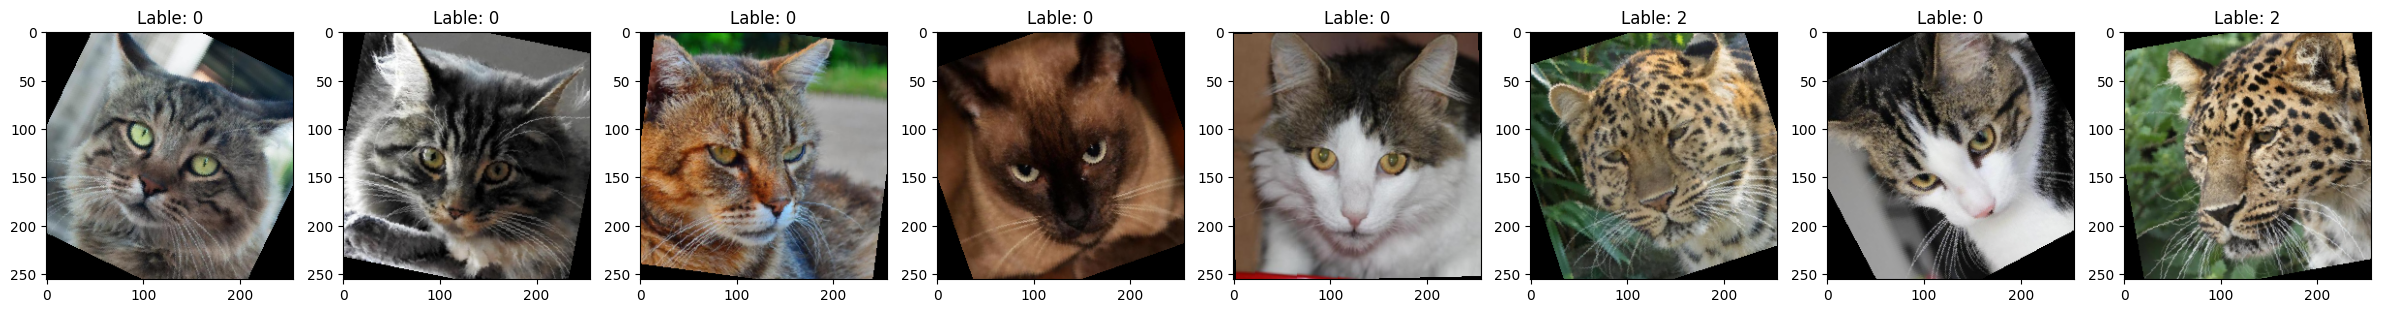

In [ ]:
def show_imgs(imgs, labels, preds=None):
    f, axes= plt.subplots(1, 8, figsize=(30,5))
    for i, axis in enumerate(axes):
        axes[i].imshow(np.squeeze(np.transpose(imgs[i].numpy(), (1, 2, 0))), cmap='gray')
        axes[i].set_title(f'Lable: {labels[i].numpy()}')
        if preds != None:
            axes[i].set_xlabel(f'Pred: {np.argmax(preds[i].numpy())}')
    plt.show()

show_imgs(images, labels)

(2) Making a customized datasets and dataloader

In [ ]:
import os

In [ ]:
train_cat = os.listdir('/content/drive/MyDrive/intro-dl/afhq/train/cat')
train_dog = os.listdir('/content/drive/MyDrive/intro-dl/afhq/train/dog')
train_wild = os.listdir('/content/drive/MyDrive/intro-dl/afhq/train/wild')

In [ ]:
train_cat_image = []
train_dog_image = []
train_wild_image = []

train_cat_target = []
train_dog_target = []
train_wild_target = []

for i in range(len(train_cat)):
  image = plt.imread(os.path.join('/content/drive/MyDrive/intro-dl/afhq/train/cat', train_cat[i] ))
  train_cat_image.append(image)
  train_cat_target.append(0)

for i in range(len(train_dog)):
  image = plt.imread(os.path.join('/content/drive/MyDrive/intro-dl/afhq/train/dog', train_dog[i]))
  train_dog_image.append(image)
  train_dog_target.append(1)

for i in range(len(train_wild)):
  image = plt.imread(os.path.join('/content/MyDrive/intro-dl/afhq/train/wild', train_wild[i]))
  train_wild_image.append(image)
  train_wild_target.append(2)



Question1.
os.path.join() 함수는 파일 경로를 조합하여 새로운 경로를 생성하는 데 사용되는 파이썬의 os 모듈 함수이다. 이 함수는 운영 체제에 특화된 경로 구분자를 사용하여 경로를 올바르게 조합하여 코드를 플랫폼 간 이식성이 높게 만들어준다

2. Backpropagation and PyTorch Autograd

In [ ]:
import torch

In [ ]:
w = torch.tensor(3.0, requires_grad = True)

In [ ]:
y = w**3 + 10

In [ ]:
y.backward()

In [ ]:
print(f'Differentiating y by w: {w.grad}')

Differentiating y by w: 27.0


In [ ]:
import torch
import torch.nn as nn

In [ ]:
x = torch.ones(5)
y = torch.zeros(3)

w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)

In [ ]:
z = torch.matmul(x, w) + b
loss_fn = nn.MSELoss()

In [ ]:
loss = loss_fn(z, y)

loss.backward()

In [ ]:
print(f'Differentiating loss by w :\n {w.grad}')
print(f'Differentiating loss by b : {b.grad}')

Differentiating loss by w :
 tensor([[ 1.6091, -1.9176, -1.2551],
        [ 1.6091, -1.9176, -1.2551],
        [ 1.6091, -1.9176, -1.2551],
        [ 1.6091, -1.9176, -1.2551],
        [ 1.6091, -1.9176, -1.2551]])
Differentiating loss by b : tensor([ 1.6091, -1.9176, -1.2551])


Question 2. Pytorch Autograd and DataLoader

신경망(Neural Network): 입력 데이터에 대해 실행되는 중첩된 함수들의 집합체
신경망 학습
1.Forward Propagation 순전파: 정답을 맞추기 위한 추측을 하기 위해서 입력 데이터를 실행
2.Back Propagation 역전파: 추측값에서 발생한 error에 대해 파라미터를 업데이트. 매개변수의 gradient를 수집, gradient descent을 사용해 매개변수를 최적화.

뉴럴네트워크 학습 알고리즘
-모든 가중치를 임의로 생성하고 순전파를 수행
-순전파에서 나온 예측값과 실제값 사이 오차 줄이기 위해 역전파 수행항 가중치 업데이트
-오차 충분히 줄어들 때까지 반복

Autograd: PyTorch를 이용해 코드를 작성할 때 역전파를 통해 파라미터 업데이트하는 방법, 연산 그래프를 활용하여 그래디언트를 자동으로 계산

Computational Graph 연산그래프
-Autograd는 데이터와 실행된 모든 연산의 기록을 DAG(방향성 비순환 그래프)에 저장
-DAG는 연쇄법칙을 사용하여 그래디언트를 자동으로 계산할 수 있는 구조를 제공

PyTorch 라이브러리 사용
-PyTorch의 torch.nn, torch.optim 등의 라이브러리를 활용하여 모델의 생성 및 학습을 용이하게 함
-DataLoader 와 Dataset을 사용하여 데이터를 불러오고 모델 학습에 활용

Dataset, DataLoader
-데이터셋 코드를 모델 학습 코드와 분리하여 가독성과 모듈성을 높이기 위해 torch.utils.data.Dataset(샘플과 정답을 저장) 및 torch.utils.data.DataLoader(반복자를 생성)를 활용

3. Vanishing Gradient Problem

In [ ]:
import matplotlib.pyplot as plt #파이썬의 시각화를 위한 인기 있는 프로팅 라이프러리
import numpy as np #파이썬의 기본적인 과학 계산 라이브러리로, 배열, 행렬 및 다양한 수학 함수 지원이 포함되어 있음
import pandas as pd #데이터 조작 및 분석을 위한 라이브러리
import tensorflow as tf #오픈 소스 머신 러닝 라이브러리
import warnings #코드 내의 경고 메세지를 제어하기 위한 라이브러리
from matplotlib.colors import ListedColormap #시각화를 위해 사용자 정의 색상 맵을 생성하는 데 사용
from mlxtend.plotting import plot_decision_regions #mlxtend는 머신 러닝 기능을 확장하기 위한 라이브러리로, 'plot_decision_regions'함수는 분류 문제의 결정 경계를 시각화하는 데 사용
from pylab import rcParams #Matplotlib의 기본 속성 설정을 위해 사용
from sklearn.datasets import make_circles, make_moons
from sklearn.model_selection import train_test_split #머신 러닝 라이브러리, 합성 데이터셋(원과 달 모양)을 생성하고 데이터셋을 훈련 및 테스트 세트로 분할하는 대 사용
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential #레이러를 선형으로 쌓아 올린 모델로, 주로 순차적인 신경망을 구축하는데 사용

In [ ]:
np.set_printoptions(suppress=True) #'suppress=Ture'는 과학적 표기 비활성화 - NumPy 배열 출력 시 과학적 표기법을 비활성화하고 실수를 일반적인 방식으로 출력하도록 설정
zero_one_colourmap = ListedColormap(('white', 'red')) #ListedColormap을 사용하여 두가지 색상으로 구성된 컬러맵 생성
rcParams['figure.figsize'] = 14, 7 #rcParams를 사용하여 생성되는 모든 플롯의 기본 크기를 가로 14, 세로 7로 설정
rcParams['axes.facecolor'] = '#383838'#rcParams를 사용하여 축의 배경 색상을 #383838로 설

In [ ]:
X, y = make_circles(n_samples = 1000, #make_circles:동심원 모양의 데이터셋을 생성하는 함수 #n_sampels: 생성할 데이터 포인트의 개수
                    factor=0.85, #외부 원과 내부 원의 거리 비, 0일 경우 완전히 겹쳐지고, 1일 경우 외부 원이 내부 원을 포함
                    random_state=2021, #난수 생성시 사용되는 시드(seed)
                    noise=0.1) #생성된 데이터에 추가되는 잡음의 양을 조절

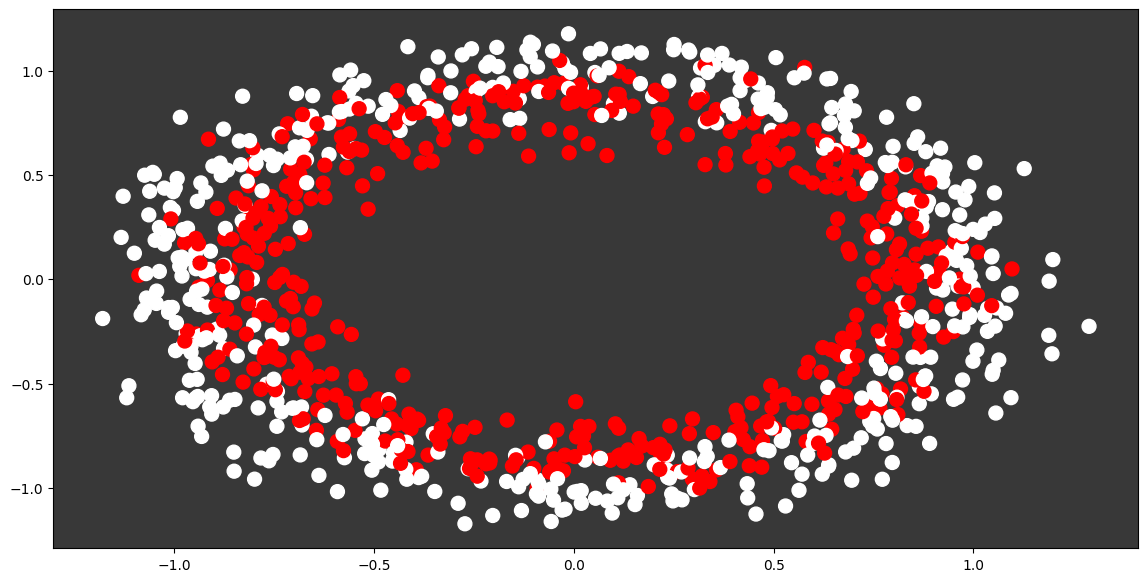

In [ ]:
plt.scatter(X[:,0],X[:,1], #각 데이터 포인트의 x와 y 좌표
            c=y, s=100, #데이터 포인트의 색상을 y 레이블에 따라 지정 #데이터 포인트의 크기를 100으로 설정
            cmap = zero_one_colourmap) #색상맵 지정.
plt.show()

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, #trin_test_split 함수는 데이터를 훈련 세트와 테스트 세트로 나눠주는 역할을 한다
                                                    test_size=0.33,  #테스트 세트의 비율
                                                    random_state=42) #난수 발생을 제어하여 동일한 결과를 얻을 수 있도록 하는 값

In [ ]:
#신경망 모델을 생성
def get_model(inp_activation):
  model = Sequential()
  model.add(Dense(10,input_dim=2, activation=inp_activation))
  model.add(Dense(10, activation = inp_activation))
  model.add(Dense(10, activation = inp_activation))
  model.add(Dense(10, activation = inp_activation))
  model.add(Dense(10, activation = inp_activation))
  model.add(Dense(10, activation = inp_activation))
  model.add(Dense(10, activation = inp_activation))
  model.add(Dense(10, activation = inp_activation))
  model.add(Dense(10, activation = inp_activation))
  model.add(Dense(10, activation = inp_activation))
  model.add(Dense(10, activation = inp_activation)) #Dense 레이어는 10개 뉴런을 가짐 #각 레이어의 활성화 함수로 inp_activation을 사용
  model.add(Dense(1, activation="sigmoid")) #sigmoid를 사용하여 이진 분류를 수행
  model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy']) #모델을 컴파일
  return model

In [ ]:
#머신러닝이나 최적화 알고리즘에서 사용될 수 있는 가중치의 변화율과 변화된 가중치의 백분율 변화를 계산
def change_in_weight_gradient(old_weight, new_weight, learning_rate):
  gradient = (old_weight - new_weight)/ learning_rate  #gradient: 이전 가중치에서 새로운 가중치로의 변화에 대한 그라디언트(기울기) 계산 #일종의 가중치 업데이트 속도
  pct_change_weight = abs(100*(old_weight - new_weight)/ old_weight) #가중치 얼마나 변화했는지 백분율 변화 계산
  return gradient, pct_change_weight

* Sigmoid Model

In [ ]:
sigmoid_model = get_model("sigmoid")  #sigmoid 모델 가져오는 함수

In [ ]:
sigmoid_model.summary() #해당 모델의 모델의 개요 확인

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 10)                110       
                                                                 
 dense_6 (Dense)             (None, 10)                1

In [ ]:
sigmoid_model_first_layer_weights = sigmoid_model.get_weights()[0][0]
#get_weights(): 모든 레이어의 가중치와 편향을 포함하는 리스트 반환
#[0]: 리스트의 첫번째 레이어
#[0][0]:첫번째 레이어의 첫번째 뉴런의 가중치

In [ ]:
sigmoid_model_first_layer_weights

array([-0.00248837,  0.00239915, -0.60947126, -0.21158999,  0.36098856,
        0.16939509,  0.59374017,  0.10976744, -0.6711931 , -0.19758916],
      dtype=float32)

In [ ]:
#sigmoid_history: 훈련 과정에서 발생한 정보를 저장하는 변수 #loss와 accuracy 등의 지표 추적에 사용
sigmoid_history = sigmoid_model.fit(X_train, y_train, epochs = 1,
                            validation_data = (X_test, y_test)) #fit: 주어진 데이터에 대해 지정된 epoch 수만큼 훈련 #validation_data: 검증 데이터를 통해 모델의 성능을 모니터링을 할 수 있도록 지정

21/21 [==============================] - 2s 13ms/step - loss: 0.7073 - accuracy: 0.4881 - val_loss: 0.6933 - val_accuracy: 0.5242


In [ ]:
sigmoid_model_first_layer_weights_updated = sigmoid_model.get_weights()[0][0]

In [ ]:
sigmoid_model_first_layer_weights_updated

array([-0.00252518,  0.00237226, -0.6094607 , -0.21160732,  0.36097854,
        0.16937713,  0.5937373 ,  0.10975286, -0.671151  , -0.19762711],
      dtype=float32)

In [ ]:
s_gradient, s_weight_change = change_in_weight_gradient(sigmoid_model_first_layer_weights,
                                                        sigmoid_model_first_layer_weights_updated,
                                                        sigmoid_model.optimizer.get_config()["learning_rate"])

In [ ]:
s_gradient #s_gradient: 가중치의 변화에 대한 그라디언트

array([ 0.03680982,  0.02688169, -0.01055002,  0.01733005,  0.01001358,
        0.0179559 ,  0.00286102,  0.01457333, -0.04214048,  0.03795326],
      dtype=float32)

In [ ]:
s_weight_change #s_weight_change: 가중치의 백분율변화

array([1.4792719 , 1.1204691 , 0.00173101, 0.00819039, 0.00277393,
       0.01060001, 0.00048186, 0.01327656, 0.00627844, 0.01920817],
      dtype=float32)

* ReLU Model

In [ ]:
activation_model = get_model("relu") #활성화 함수로 ReLU 함수 사

In [ ]:
activation_model_old_first_layer_weight = activation_model.get_weights()[0][0]
activation_model_old_first_layer_weight #첫번째 레이어의 첫번째 뉴런에 대한 가중치

array([-0.16762608, -0.41365868, -0.44229797, -0.2781402 ,  0.20271069,
        0.6228321 ,  0.38148457, -0.4417647 , -0.30753982, -0.08631337],
      dtype=float32)

In [ ]:
activation_history = activation_model.fit(X_train, y_train, epochs = 1,
                                          validation_data = (X_test, y_test))

21/21 [==============================] - 2s 12ms/step - loss: 0.6932 - accuracy: 0.5090 - val_loss: 0.6933 - val_accuracy: 0.4758


In [ ]:
activation_model_updated_first_layer_weight = activation_model.get_weights()[0][0]

In [ ]:
activation_model_updated_first_layer_weight

array([-0.17065918, -0.4144817 , -0.43482724, -0.28214905,  0.20971853,
        0.6305506 ,  0.38281283, -0.44162753, -0.3136567 , -0.08431479],
      dtype=float32)

In [ ]:
relu_gradient, relu_weight_change = change_in_weight_gradient(activation_model_old_first_layer_weight,
                                                              activation_model_updated_first_layer_weight,
                                                              activation_model.optimizer.get_config()["learning_rate"])

In [ ]:
relu_gradient

array([ 3.0331013 ,  0.8230209 , -7.4707265 ,  4.008859  , -7.007837  ,
       -7.718503  , -1.3282596 , -0.13718009,  6.1168666 , -1.9985809 ],
      dtype=float32)

In [ ]:
relu_weight_change

array([1.8094449 , 0.19896136, 1.689071  , 1.441309  , 3.4570634 ,
       1.239259  , 0.34818175, 0.03105275, 1.9889675 , 2.3154943 ],
      dtype=float32)

4. Regression

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, metrics

In [ ]:
!pop install pandas
import pandas as pd

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+",
          skiprows=22, header=None)

/bin/bash: line 1: pop: command not found


In [ ]:
X = np.hstack([raw_df.values[::2,:],
        raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]

In [ ]:
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [ ]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [ ]:
##np.hstack: h는 horizontal, 즉 수평이란 뜻으로 hstack을 사용하면 가로로 행렬 결합이 이루어진다

a = np.arange(10).reshape(2,5)
b = np.arange(6).reshape(2,3)
c = np.hstack((a,b))

print(a)
print(b)
print(c)

[[0 1 2 3 4]
 [5 6 7 8 9]]
[[0 1 2]
 [3 4 5]]
[[0 1 2 3 4 0 1 2]
 [5 6 7 8 9 3 4 5]]


In [ ]:
##np.vstack: v는 vertical, 즉 수직이란 뜻으로 vstack을 사용하면 수직으로 행력 결합이 이루어진다
a = np.arange(10).reshape(2,5)
b = np.arange(15).reshape(3,5)
c = np.vstack((a,b))

print(a)
print(b)
print(c)

[[0 1 2 3 4]
 [5 6 7 8 9]]
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]


In [ ]:
##np.concatenate: 선택한 축의 방향으로 배열을 연결해주는 방법
A1 = np.array([[1,2,3],[10,20,30]])
B1 = np.array([[4,5,6],[40,50,60]])

np.concatenate((A1,B1),axis=0) #2차원에서 axis=0은 행 방향을 의미

array([[ 1,  2,  3],
       [10, 20, 30],
       [ 4,  5,  6],
       [40, 50, 60]])

In [28]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [29]:
print('Coefficients: ', reg.coef_)

print('Variance score: {}'.format(reg.score(X_test, y_test)))

Coefficients:  [-1.28749718e-01  3.78232228e-02  5.82109233e-02  3.23866812e+00
 -1.61698120e+01  3.90205116e+00 -1.28507825e-02 -1.42222430e+00
  2.34853915e-01 -8.21331947e-03 -9.28722459e-01  1.17695921e-02
 -5.47566338e-01]
Variance score: 0.7261570836552483


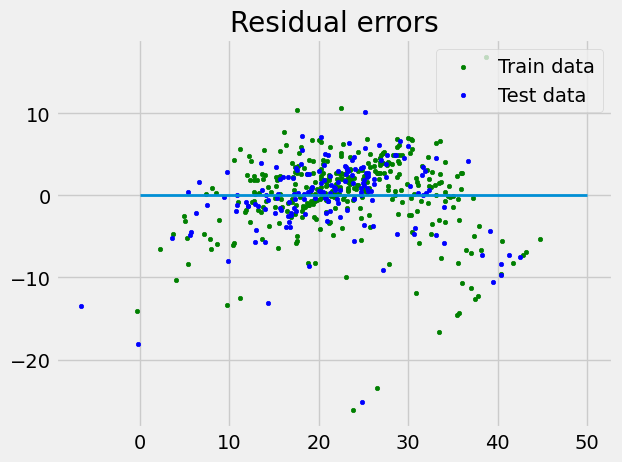

In [32]:
plt.style.use('fivethirtyeight')

plt.scatter(reg.predict(X_train),
            reg.predict(X_train) - y_train,
            color="green", s=10,
            label='Train data')

plt.scatter(reg.predict(X_test),
            reg.predict(X_test) - y_test,
            color="blue", s=10,
            label='Test data')

plt.hlines(y=0, xmin=0, xmax=50, linewidth=2)

plt.legend(loc='upper right')

plt.title("Residual errors")

plt.show()

5. Activation Function

In [36]:
## 1. Sigmoid
import torch
import torch.nn as nn

class DenseBlock(nn.Module):
  def __init__(self, in_dim, out_dim):
    super(DenseBlock, self).__init__()
    self.dense = nn.Linear(in_dim, out_dim)
    self.act = nn.Sigmoid()

  def forward(self, x):
    out = self.act(self.dense(x))
    return out

In [38]:
## 2. Tanh
import torch
import torch.nn as nn

class DenseBlock(nn.Module):
  def __init__(self, in_dim, out_dim):
    super(DenseBlock, self).__init__()
    self.dense = nn.Linear(in_dim, out_dim)
    self.act = nn.Tanh()

  def forward(self, x):
    out = self.act(self.dense(x))
    return out

In [39]:
## 3. ReLU
import torch
import torch.nn as nn

class DenseBlock(nn.Module):
  def __init__(self, in_dim, out_dim):
    super(DenseBlock, self).__init__()
    self.dense = nn.Linear(in_dim, out_dim)
    self.act = nn.ReLU()

  def forward(self, x):
    out = self.act(self.dense(x))
    return out

In [40]:
## 4. Leaky ReLU
import torch
import torch.nn as nn

class DenseBlock(nn.Module):
  def __init__(self, in_dim, out_dim):
    super(DenseBlock, self).__init__()
    self.dense = nn.Linear(in_dim, out_dim)
    self.act = nn.LeakyReLU()

  def forward(self, x):
    out = self.act(self.dense(x))
    return out

Question 4

In [42]:
import torch
import torch.nn as nn

class DenseClock(nn.Module):
  def __init__(self, in_dim, out_dim):
    super(DenseBlock, self).__init__()
    self.dense = nn.Maxout()

  def forward(self, x):
    out = self.act(self.dense(X))
    return out

In [43]:
import torch
import torch.nn as nn

class DenseBlock(nn.Module):
    def __init__(self, in_dim, out_dim):
        super(DenseBlock, self).__init__()
        self.dense = nn.Linear(in_dim, out_dim)
        self.act = nn.ELU()

    def forward(self, x):
        out = self.act(self.dense(x))
        return out

In [45]:
##GELU(Gaussian Error Linear Unit: 입력값에 대해 비선형적인 활성화를 제공하면서 훈련 중에 일반적인 성능을 나타내는 특징을 가짐
## sigmoid함수와 tanh함수의 조합을 사용
##입력값이 0 근처에서는 선형적인 증가를 나타내고, 큰 입력값에서는 비선형적으로 포화
import torch
import torch.nn as nn

class DenseBlock(nn.Module):
    def __init__(self, in_dim, out_dim):
        super(DenseBlock, self).__init__()
        self.dense = nn.Linear(in_dim, out_dim)
        self.act = nn.GELU()

    def forward(self, x):
        out = self.act(self.dense(x))
        return out